### Código LEC3 2024-2

Grupo A 

In [16]:
# Importación de librerías:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import norm, t
import statsmodels.api as sm


Pregunta 2.1:

c) Grafique la distribución de probabilidad y la distribución de probabilidad acumulada. 

In [17]:
# Definimos el valor de lambda
v_lambda = 20

# Definimos los valores de k
k = np.arange(0, 41)

# Función de distribución de probabilidad de Poisson 
poisson_pmf = poisson.pmf(k, v_lambda)

# Función de distribución acumulada de Poisson:
poisson_cdf = np.cumsum(poisson_pmf)

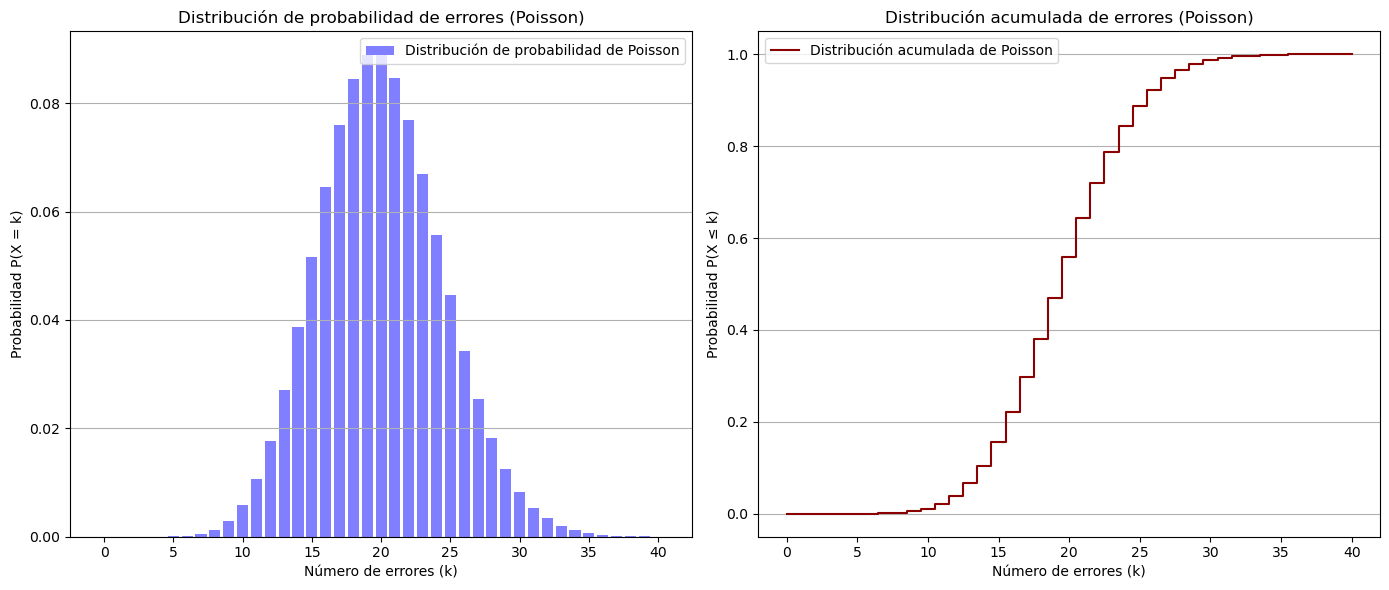

In [18]:

# Graficamos la distribución de probabilidad y la distribución acumulada de Poisson:
plt.figure(figsize=(14,6))

# Distribución de probabilidad
plt.subplot(1, 2, 1)
plt.bar(k, poisson_pmf, color='blue', alpha=0.5, label='Distribución de probabilidad de Poisson')
plt.title('Distribución de probabilidad de errores (Poisson)')
plt.xlabel('Número de errores (k)')
plt.ylabel('Probabilidad P(X = k)')
plt.xticks(k[::5])  # Mostrar ticks cada 5
plt.grid(axis='y')
plt.legend()

# Distribución acumulada
plt.subplot(1, 2, 2)
plt.step(k, poisson_cdf, color='darkred', where='mid', label='Distribución acumulada de Poisson')
plt.title('Distribución acumulada de errores (Poisson)')
plt.xlabel('Número de errores (k)')
plt.ylabel('Probabilidad P(X ≤ k)')
plt.xticks(k[::5])  
plt.grid(axis='y')
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

d) ¿Cuál es la probabilidad de que cometa más de 3 errores pero menos de 7?

In [19]:
# Necesitamos encontrar P(X=4) + P(X=5) + P(X=6)
resultado = poisson_pmf[4] + poisson_pmf[5] + poisson_pmf[6]
print(resultado*100)

0.025191877607582357


e) ¿Qué sucede con la distribución de probabilidad cuando la tasa de errores disminuye a
un error cada 5, 6, 7, 8, 9 y 10 líneas de código? Grafique la distribución de probabilidad
en función de la tasa de errores. Comente sus observaciones

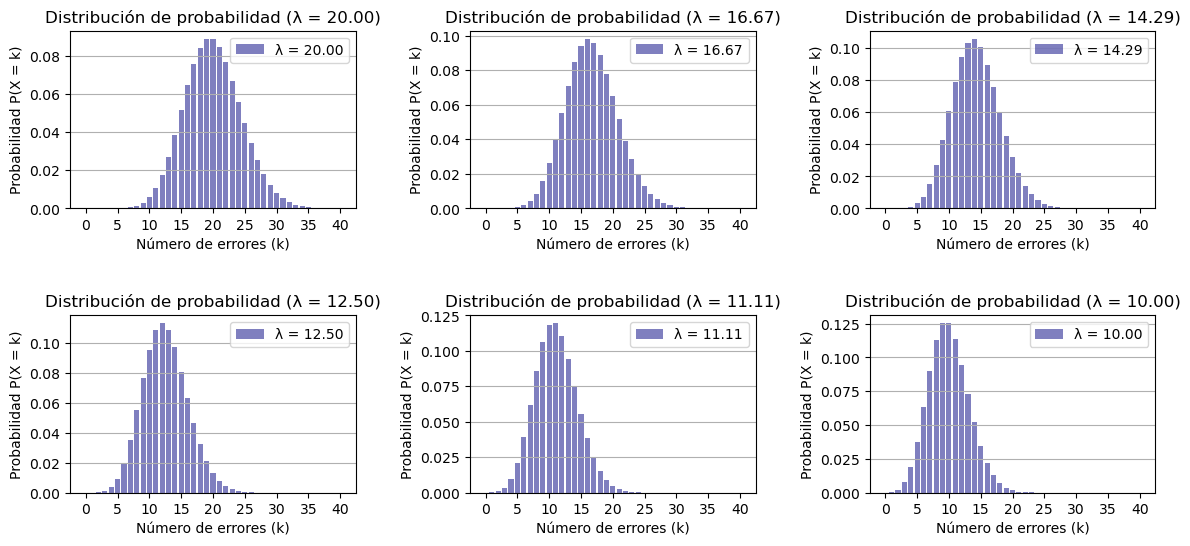

In [20]:
#Definimos los distintos valores de lambda
valores_lambda = [20, 100/6, 100/7, 100/8, 100/9, 10]

plt.figure(figsize=(14,6))

# Calculamos sus distribuciones de probabilidad
for i, v in enumerate(valores_lambda, 1):
    poisson_pmf = poisson.pmf(k, v)
    plt.subplot(2, 3, i)
    plt.bar(k, poisson_pmf, color='navy', alpha=0.5, label=f'λ = {v:.2f}')
    plt.title(f'Distribución de probabilidad (λ = {v:.2f})')
    plt.xlabel('Número de errores (k)')
    plt.ylabel('Probabilidad P(X = k)')
    plt.xticks(k[::5])
    plt.grid(axis='y')
    plt.legend()
    plt.subplots_adjust(wspace=0.4, hspace=0.6)  
plt.show()

Pregunta 2.2:

a) Determine la media µ y la desviación estándar σ para la distribución t-student con los
parámetros indicados previamente.

In [21]:
#Se responde en el PDF

b) Usando 1000 muestras, genere los conjuntos S5,S10,S100,S1000 con los valores de n :
5,10,100,1000, respectivamente.

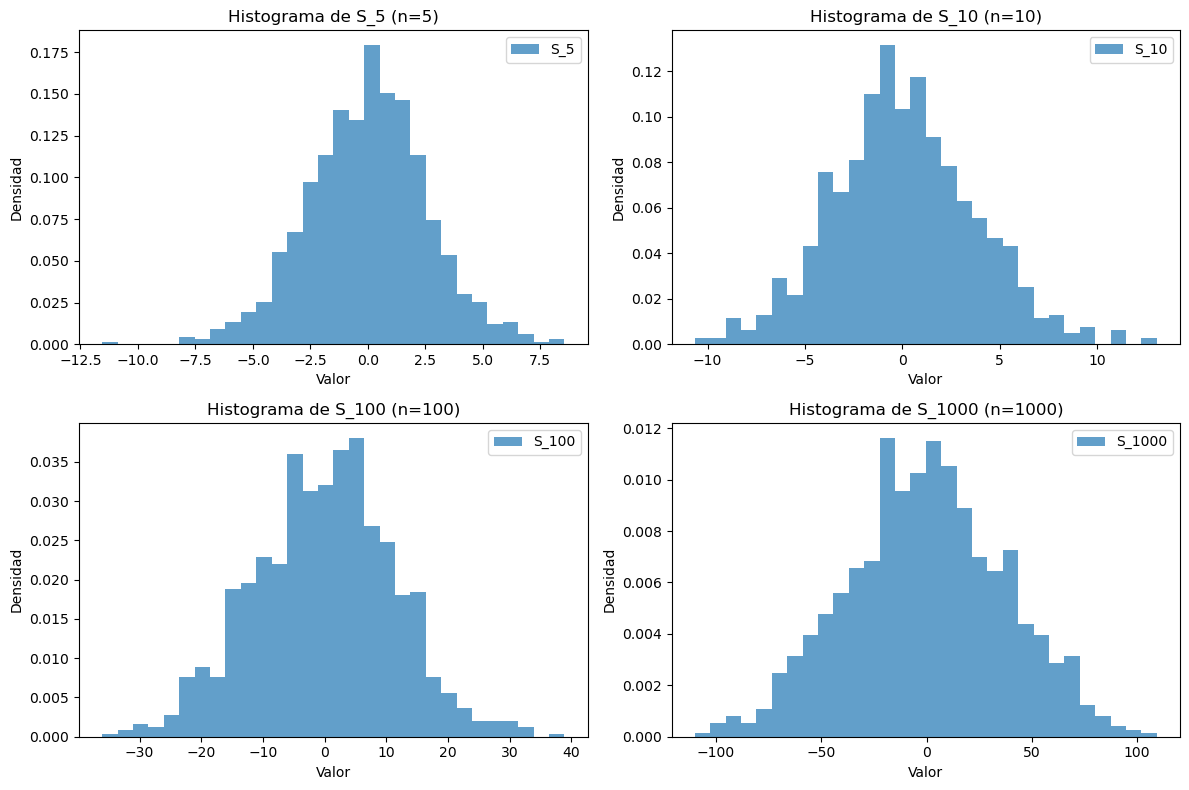

In [22]:
# Grados de libertad
grados = 8

# Número de muestras
muestras = 1000

# Valores de n
valores_n = [5, 10, 100, 1000]

# Inicializamos un diccionario
S_n = {}

# Generar muestras y calcular las sumas S_n para cada n
for n in valores_n:
    samples = stats.t.rvs(grados, size=(muestras, n))
    S_n[n] = np.sum(samples, axis=1)


# Graficar los histogramas de los conjuntos S5, S10, S100, S1000
plt.figure(figsize=(12, 8))
for i, n in enumerate(valores_n, 1):
    plt.subplot(2, 2, i)
    plt.hist(S_n[n], bins=30, density=True, alpha=0.7, label=f'S_{n}')
    plt.title(f'Histograma de S_{n} (n={n})')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
plt.show()

c) Para cada conjunto Sn, estandarice los valores para generar un conjunto estandarizado
Zn.


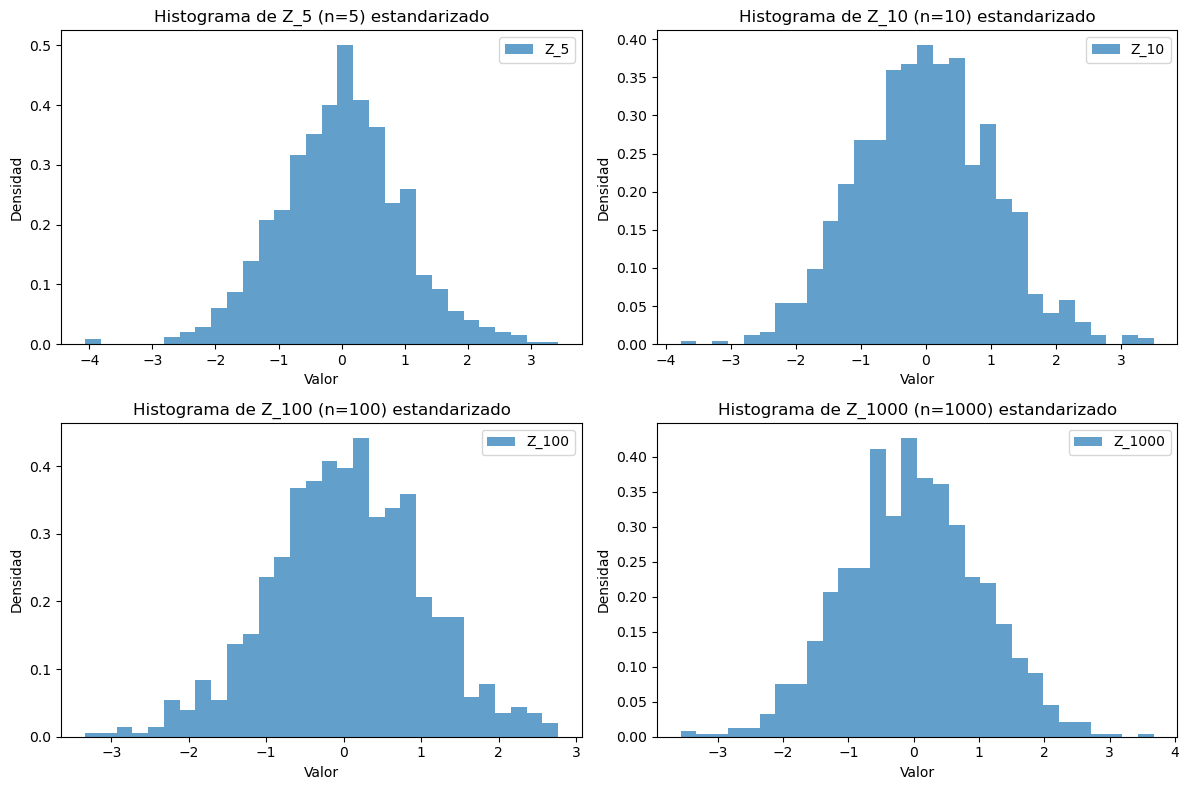

In [23]:
# Grados de libertad
grados = 8
# Número de muestras
muestras = 1000
# Valores de n
valores_n = [5, 10, 100, 1000]

# Inicializamos un diccionario
S_n = {}

# Generar muestras y calcular las sumas S_n para cada n
for n in valores_n:
    samples = stats.t.rvs(grados, size=(muestras, n))
    S_n[n] = np.sum(samples, axis=1)

mean = 0  
std_dev = np.sqrt(grados / (grados - 2))  # Ya calculado como 1.1547 para grados = 8

# Inicializamos un diccionario para almacenar los conjuntos Z_n
Z_n = {}

# Estandarizar los conjuntos S_n
for n in valores_n:
    Z_n[n] = (S_n[n] - n * mean) / (std_dev * np.sqrt(n))

# Graficar los histogramas de los conjuntos Z5, Z10, Z100, Z1000
plt.figure(figsize=(12, 8))

for i, n in enumerate(valores_n, 1):
    plt.subplot(2, 2, i)
    plt.hist(Z_n[n], bins=30, density=True, alpha=0.7, label=f'Z_{n}')
    plt.title(f'Histograma de Z_{n} (n={n}) estandarizado')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
plt.show()

d) Para cada conjunto Zn, grafique su densidad y agregue la función de distribución normal estándar para comparar. Comente sus observaciones.

C:\Users\nicol\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicol\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

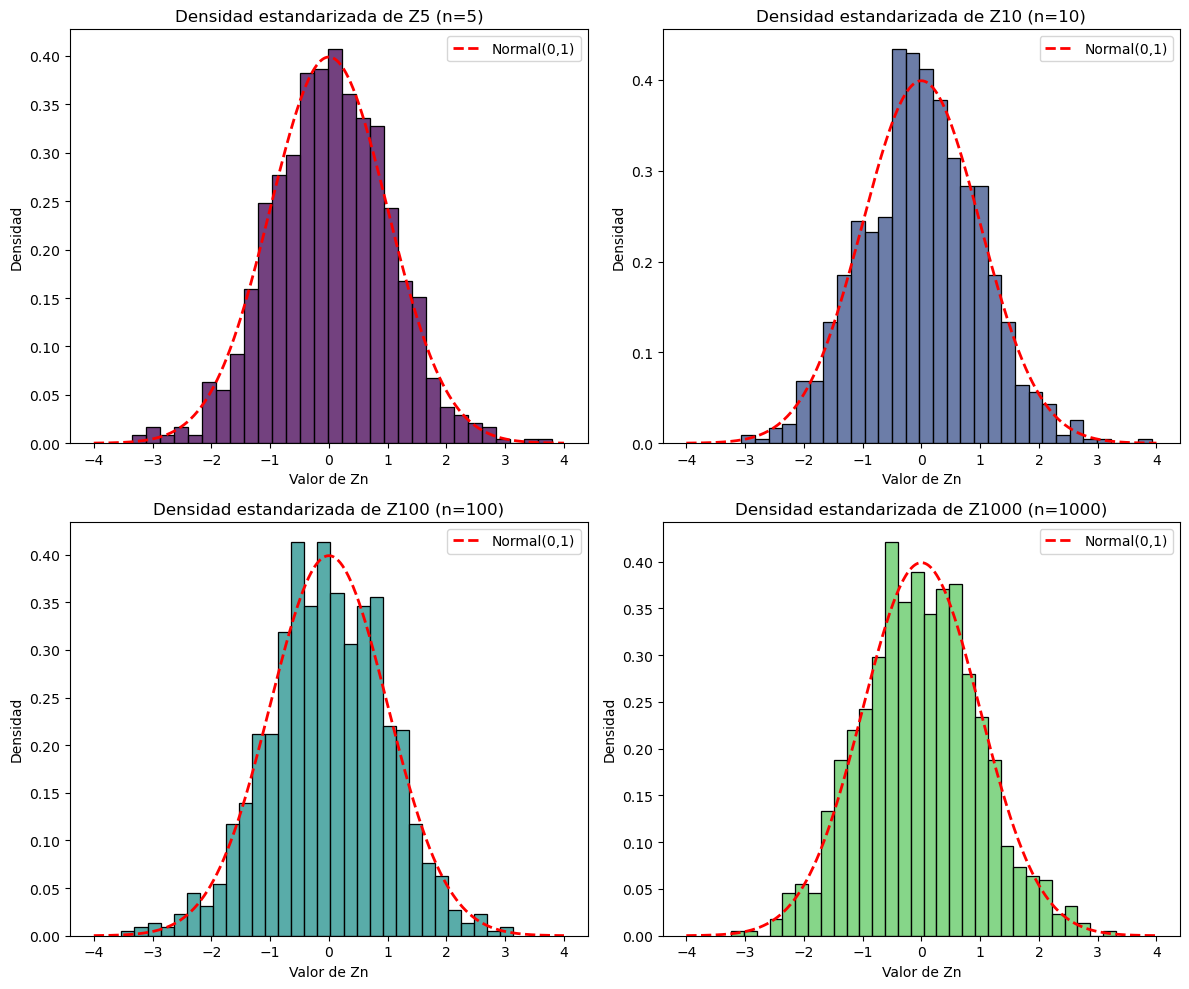

In [24]:

grados = 8  # Grados de libertad
valores_n = 1000  # Número de muestras
media = 0  # Media 
sigma = np.sqrt(grados / (grados - 2))  # Desviación estándar

# Valores de n para generar los conjuntos S5, S10, S100, S1000
n_values = [5, 10, 100, 1000]
S_sets = {}
Z_sets = {}

# Generar y estandarizar los conjuntos
for n in n_values:

    S_n = np.sum(t.rvs(grados, size=(valores_n, n)), axis=1)
    S_sets[f'S{n}'] = S_n
    
    Z_n = (S_n - n * media) / (sigma * np.sqrt(n))
    Z_sets[f'Z{n}'] = Z_n

# Configuración de las gráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas de gráficos

# Graficar cada conjunto Z_n en su propio subplot y superponer la distribución normal estándar
x = np.linspace(-4, 4, 1000) 
normal_density = norm.pdf(x)  

for i, n in enumerate(n_values):
    ax = axes[i // 2, i % 2]  
    
    # Graficar la densidad de Z_n
    sns.histplot(Z_sets[f'Z{n}'], kde=False, bins=30, ax=ax, stat="density", color=plt.cm.viridis(i / len(n_values)))
    
    # Superponer la curva de la distribución normal estándar
    ax.plot(x, normal_density, 'r--', label='Normal(0,1)', lw=2)
    
    ax.set_title(f"Densidad estandarizada de Z{n} (n={n})")
    ax.set_xlabel("Valor de Zn")
    ax.set_ylabel("Densidad")
    ax.legend()

plt.tight_layout() 
plt.show()

e) Construya un gráfico Q-Q normal para los conjuntos de Zn obtenidos en la pregunta anterior. Comente sus observaciones con respecto a los gráficos, basándose en las
propiedades de los gráficos Q-Q normales. 

<Figure size 1200x800 with 0 Axes>

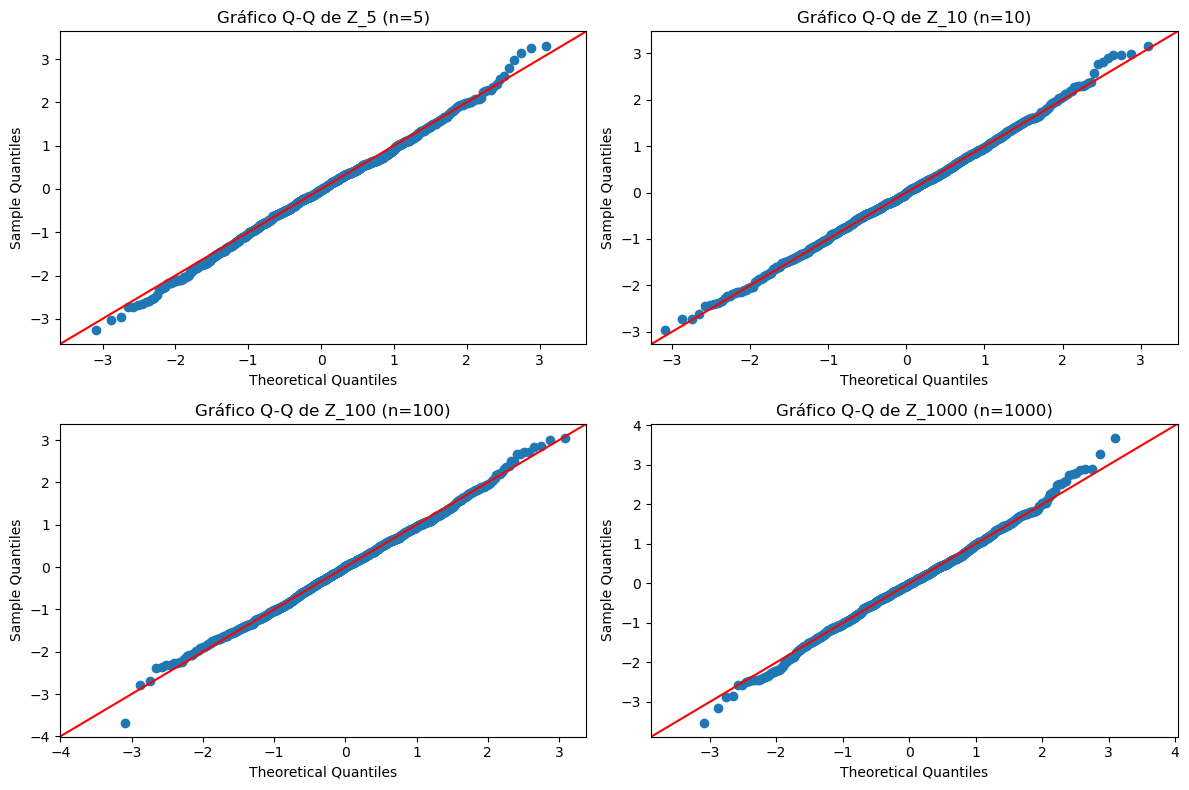

In [25]:
# Grados de libertad
grados = 8
# Número de muestras
muestras = 1000
# Valores de n
valores_n = [5, 10, 100, 1000]

# Inicializamos un diccionario
S_n = {}

# Generar muestras y calcular las sumas S_n para cada n
for n in valores_n:
    samples = stats.t.rvs(grados, size=(muestras, n))
    S_n[n] = np.sum(samples, axis=1)

mean = 0  
std_dev = np.sqrt(grados / (grados - 2))  # Ya calculado como 1.1547 para grados = 8

# Inicializamos un diccionario para almacenar los conjuntos Z_n
Z_n = {}

# Estandarizar los conjuntos S_n
for n in valores_n:
    Z_n[n] = (S_n[n] - n * mean) / (std_dev * np.sqrt(n))

# Graficar las densidades de los conjuntos Z5, Z10, Z100, Z1000 y superponer la normal estándar
plt.figure(figsize=(12, 8))

# Espacio de valores para la curva de distribución normal estándar
x = np.linspace(-4, 4, 1000)
normal_pdf = norm.pdf(x, 0, 1)

# Graficar los gráficos Q-Q para los conjuntos Z5, Z10, Z100, Z1000
plt.figure(figsize=(12, 8))

for i, n in enumerate(valores_n, 1):
    plt.subplot(2, 2, i)
    
    # Gráfico Q-Q para el conjunto Z_n
    sm.qqplot(Z_n[n], line='45', ax=plt.gca())
    plt.title(f'Gráfico Q-Q de Z_{n} (n={n})')

plt.tight_layout()
plt.show()

f) ¿Cambian sus observaciones de los incisos anteriores al cambiar la distribución de
probabilidad usada? Explique.

In [26]:
#Se responde en el PDF

g) ¿Qué sucede si se toman muestras de más de una distribución? Explique.

In [27]:
#Se responde en el PDF

Pregunta 2.3

a) Simule los tiempos entre descomposiciones de 500 átomos de una muestra radiactiva. El proceso sigue una distribución Gamma con parámetros α = 4 y β = 1,5 (donde α representa el número de etapas intermedias en el proceso de descomposición y β el tiempo promedio entre etapas).

In [28]:
# Definimos los parametros
alpha = 4
beta = 1.5
n_atomos = 500

# Simulacion de los tiempos entre descomposiciones
tiempos = np.random.gamma(alpha, beta, n_atomos)


b) Calcule la media y la varianza de los datos generados, para luego compararlas con la media y varianza teórica de la distribución. Adjunte las fórmulas teóricas.

In [29]:
# Media y varianza de los datos simulados
media1 = np.mean(tiempos)
varianza1 = np.var(tiempos)

print(f"Media simulada: {media1}")
print(f"Varianza simulada: {varianza1}")

# Media y varianza teorica
media2 = alpha * beta
varianza2 = alpha * (beta ** 2)

print(f"Media teórica: {media2}")
print(f"Varianza teórica: {varianza2}")

Media simulada: 5.689228734289925
Varianza simulada: 8.525042250084725
Media teórica: 6.0
Varianza teórica: 9.0


c) Visualice la distribución de los datos y superponga la densidad teórica de la distribución Gamma con los parámetros utilizados.

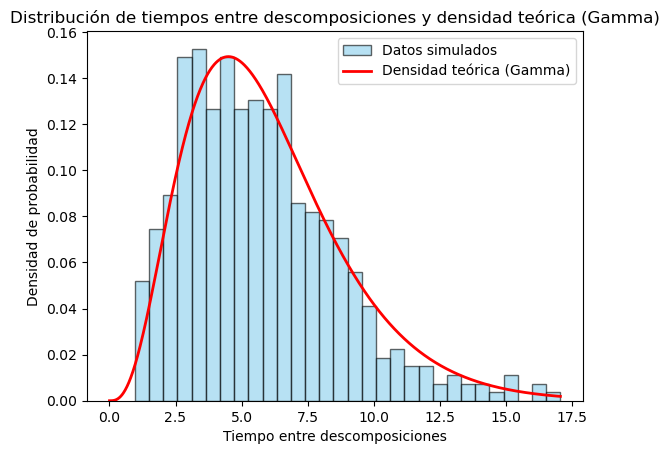

In [30]:
# Histograma para los datos simulados
plt.hist(tiempos, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Datos simulados')

# Valores para la densidad teórica de la distribución Gamma
x = np.linspace(0, max(tiempos), 1000)
densidad_teorica = gamma.pdf(x, a=alpha, scale=beta)

# Superponer la densidad teórica
plt.plot(x, densidad_teorica, 'r-', lw=2, label='Densidad teórica (Gamma)')

plt.title('Distribución de tiempos entre descomposiciones y densidad teórica (Gamma)')
plt.xlabel('Tiempo entre descomposiciones')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()

d) ¿Qué interpretación tienen los parámetros α y β dentro de una distribución Gamma?
Explique cómo se podrían interpretar en este contexto físico con los valores propuestos

In [31]:
#Se responde en el PDF

e) Ahora simule el proceso para 10,000 átomos ¿cómo se comporta el tiempo total de
descomposición de la muestra completa? Compárelo con los resultados obtenidos para los 500 átomos iniciales. ¿Cómo cambia la estimación de la media y la varianza con
un número mayor de simulaciones? Adjunte gráficos comparativos y comente

Media simulada: 6.014374646620575
Varianza simulada: 8.895202524225866


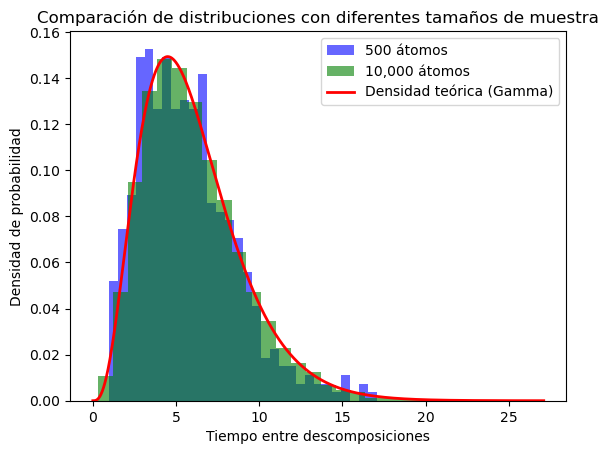

In [32]:
# Simulación para 10,000 átomos
n_atomos_10000 = 10000
tiempos_2 = np.random.gamma(alpha, beta, n_atomos_10000)

# Media y varianza de los nuevos datos simulados
media1_10000 = np.mean(tiempos_2)
varianza1_10000 = np.var(tiempos_2)

print(f"Media simulada: {media1_10000}")
print(f"Varianza simulada: {varianza1_10000}")

# Comparación gráfica de las distribuciones
plt.hist(tiempos, bins=30, density=True, alpha=0.6, color='blue', label='500 átomos')
plt.hist(tiempos_2, bins=30, density=True, alpha=0.6, color='green', label='10,000 átomos')

# Superponer la densidad teórica
x = np.linspace(0, max(tiempos_2), 1000)
densidad_teorica = gamma.pdf(x, a=alpha, scale=beta)
plt.plot(x, densidad_teorica, 'r-', lw=2, label='Densidad teórica (Gamma)')

plt.title('Comparación de distribuciones con diferentes tamaños de muestra')
plt.xlabel('Tiempo entre descomposiciones')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()


Pregunta 2.4

a)Grafique el promedio muestral X¯n en
función del tamaño de la muestra n. En el mismo gráfico compare con el valor teórico
de la distribución. Comente y explique los comportamientos.

In [33]:
dfn, dfd = 3, 5
tamaño_sims = [10, 100, 500, 1000, 2000, 5000, 7000, 10000]

simulaciones = []
for tamaño in tamaño_sims:
    simulacion = f.rvs(dfn, dfd, size=tamaño)
    simulaciones.append(np.mean(simulacion))

valor_teorico = dfd / (dfd - 2)

plt.figure(figsize=(10,6))
plt.plot(tamaño_sims, simulaciones, label='Promedio muestral', marker='o')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label='Valor teórico')
plt.xlabel('Tamaño de la muestra (n)')
plt.ylabel('Promedio muestral')
plt.title('Verificación de la Ley Débil de los Grandes Números con distribución F')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'f' is not defined

b)Grafique en función del tamaño de la muestra ¿qué comportamientos observa? 

In [34]:
dfn, dfd = 3, 5
sim_tamaño = [10, 100, 500, 1000, 2000, 5000, 7000, 10000]

simulaciones = []
for tamaño in sim_tamaño:
    sim = f.rvs(dfn, dfd, size=tamaño)
    simulaciones.append(np.mean(sim))

error_teorico = dfd / (dfd - 2)

error_practico = [abs(mean- error_teorico) for mean in simulaciones]


plt.figure(figsize=(10,6))
plt.plot(sim_tamaño, error_practico, marker='o', label='Error absoluto')
plt.xlabel('Tamaño de la muestra (n)')
plt.ylabel('Error absoluto')
plt.title('Error absoluto entre promedio muestral y valor teórico')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'f' is not defined

c)¿Todas las distribuciones se comportan de la misma manera? Presente su
desarrollo y experimentos para responder la pregunta.

In [35]:
dfn, dfd = 3, 5
tamaño_sim = [10, 100, 500, 1000, 2000, 5000, 7000, 10000]

def calcular_error(distribution, teoria, tamaño_sim):
    simulaciones = [np.mean(distribution(tamaño)) for tamaño in tamaño_sim]
    absolute_errors = [abs(sim - teoria) for sim in simulaciones]
    return absolute_errors

normal_sim = 0
normal_error = calcular_error(lambda n: np.random.normal(loc=0, scale=1, size=n), normal_sim, tamaño_sim)

exponential_sim = 1
exponential_error = calcular_error(lambda n: np.random.exponential(scale=1, size=n), exponential_sim, tamaño_sim)

cauchy_median = 0
cauchy_error = calcular_error(lambda n: np.random.standard_cauchy(size=n), cauchy_median, tamaño_sim)

f_sim = dfd / (dfd - 2)
f_error = calcular_error(lambda n: f.rvs(dfn, dfd, size=n), f_sim, tamaño_sim)


plt.figure(figsize=(10,6))
plt.plot(tamaño_sim, normal_error, marker='o', label='Distribución Normal')
plt.plot(tamaño_sim, exponential_error, marker='o', label='Distribución Exponencial')
plt.plot(tamaño_sim, cauchy_error, marker='o', label='Distribución Cauchy')
plt.plot(tamaño_sim, f_error, marker='o', label='Distribución F (Fisher-Snedecor)')
plt.xlabel('Tamaño de la muestra (n)')
plt.ylabel('Error absoluto')
plt.title('Velocidad de convergencia: Diferentes distribuciones')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'f' is not defined

d)Investigue las diferencias entre la ley débil y ley fuerte de los grandes números. ¿Cuál
de las dos leyes es más útil en relación a las simulaciones estadísticas?

In [ ]:
#Se responde en PDF